In [1]:
import pandas as pd
from keras.utils import to_categorical
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import keras_metrics

Using TensorFlow backend.


In [47]:


LE = LabelEncoder()
train_df=pd.read_csv('musk_csv.csv')
train_df = train_df.rename(columns=({'class':'class1'}))


train_df['conformation']=LE.fit_transform(train_df['conformation_name'])
train_df=train_df.drop(['conformation_name'],axis=1)
X=train_df.drop(columns=['class1','molecule_name','ID'])
y = train_df['class1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=100)
y_test1 = to_categorical(y_test)
y_train1= to_categorical(y_train)

model=keras.models.Sequential()

n_col=X_train.shape[1]


model.add(keras.layers.Dense(200,activation ='relu', input_shape=(n_col,)))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))



model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])
history=model.fit(X_train,y_train1, epochs=8,batch_size=25, validation_data=(X_test, y_test1))

tracking <tf.Variable 'Variable_48:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_49:0' shape=() dtype=int32> fp
tracking <tf.Variable 'Variable_50:0' shape=() dtype=int32> tp
tracking <tf.Variable 'Variable_51:0' shape=() dtype=int32> fn
Train on 5278 samples, validate on 1320 samples
Epoch 1/8
5278/5278 [==============================] - 1s 136us/step - loss: 10.0990 - accuracy: 0.8748 - precision: 0.8955 - recall: 0.8878 - val_loss: 1.3081 - val_accuracy: 0.9205 - val_precision: 0.9821 - val_recall: 0.9311
Epoch 2/8
5278/5278 [==============================] - 0s 80us/step - loss: 1.7874 - accuracy: 0.9261 - precision: 0.9598 - recall: 0.9591 - val_loss: 1.0521 - val_accuracy: 0.9439 - val_precision: 0.9766 - val_recall: 0.9590
Epoch 3/8
5278/5278 [==============================] - 0s 82us/step - loss: 1.2568 - accuracy: 0.9392 - precision: 0.9651 - recall: 0.9647 - val_loss: 0.8567 - val_accuracy: 0.9598 - val_precision: 0.9660 - val_recall: 0.9893
Epoch 4/8
5278/5278 

In [51]:
model.save('my_model.h5')

In [52]:
y_test=print(np.array(y_test))
print(y_test)

[0 0 1 ... 1 0 1]
None


dict_keys(['val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'loss', 'accuracy', 'precision', 'recall'])


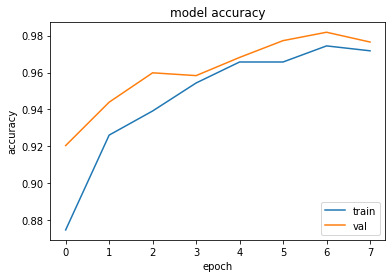

In [53]:
from matplotlib import pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('fig1')
fig1=plt.show()



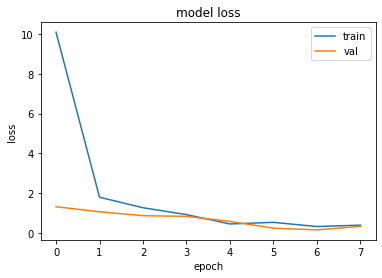

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('fig2')
plt.show()

In [10]:
y_test_pred = model.predict_classes(X_test)
y_test_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)